#  Generate the corpus for the Wahlprogramm analysis

First we will read the election programs for "AfD", "CDU", "Die Grünen", "SPD", "FDP", "Die Partei", "Piraten" and "Volt" from PDF documents.
The program for "Die Linke" will be parsed from their website as the PDF is a two columned text per side which makes it hard to extract the text via basic python libraries.

We will start with creating a Pandas DataFrame to hold our data. At the end all data will be stored in a single csv file.

In [84]:
import pandas as pd

programs_df = pd.DataFrame()
print(programs_df)

Empty DataFrame
Columns: []
Index: []


All programs available as a machine readable PDF document are stored in the directory "./Wahlprogramme". We generate a list of all these files to read them later for parsing.

In [85]:
import os

programs_base_path = './Wahlprogramme'

# r=root, d=directories, f = files
for r, d, f in os.walk(programs_base_path):        
    for file in f:
        if '.pdf' in file:
            full_path = os.path.join(r, file)
            party_name = os.path.dirname(full_path).replace("./Wahlprogramme/", "")
            # Create a vector with document path and party label
            document_vector = pd.DataFrame({
                'party': [party_name],
                'path': [full_path]
            })
            # Add vector to programm paths dataframe
            programs_df = pd.concat([programs_df, document_vector])

print("Found {} files in directory".format(len(programs_df)))
print(programs_df)

Found 78 files in directory
         party                                               path
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_Bremen_20...
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_NRW_2017.pdf
0          FDP  ./Wahlprogramme/FDP/FDP_Grundsatzprogramm_2012...
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_NDS_2017.pdf
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_Brandenbu...
..         ...                                                ...
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Bundest...
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...

[78 rows x 2 columns]


Next we iterate over all available PDF programs and add them do the programs dataframe

In [86]:
# Import PDF-reader package 'pdftotext' to extract text from PDF documents
import pdftotext

text_list = []

for index, program in programs_df.iterrows():
    # Load PDF document
    with open(program.path, 'rb') as f:
        program_pdf = pdftotext.PDF(f)# Load PDF document
        # Extract all pages text into one string
        program_text = '\n\n'.join(program_pdf)
        text_list.append(program_text)

programs_df = programs_df.assign(text = text_list)
print(programs_df)

         party                                               path  \
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_Bremen_20...   
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_NRW_2017.pdf   
0          FDP  ./Wahlprogramme/FDP/FDP_Grundsatzprogramm_2012...   
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_NDS_2017.pdf   
0          FDP  ./Wahlprogramme/FDP/FDP_Wahlprogramm_Brandenbu...   
..         ...                                                ...   
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Bundest...   
0   Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   

                                                 text  
0   \n\n3\n\nLiebe Bremerinnen und Bremer,\nliebe ...  
0   Landtagswahlprogramm 2017 Seite 0 von 54\n\nLa...  
0       

Die meisten Dokumente kommen von der AfD, mit 18 von 78 Dokumenten.


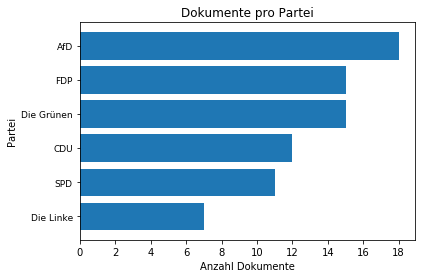

In [87]:
import matplotlib.pyplot as plt
import numpy as np

programs_total = programs_df.groupby(['party']).count().sort_values(by=['path']).reset_index()

print("Die meisten Dokumente kommen von der {}, mit {} von {} Dokumenten.".format(programs_total.iloc[-1]['party'], programs_total.iloc[-1]['path'], programs_total['path'].sum()))

index = np.arange(len(programs_total))

plt.barh(index, programs_total['path'])
plt.yticks(index, programs_total['party'], fontsize=9)
plt.ylabel('Partei')
plt.xticks(np.arange(0, programs_total.iloc[-1]['path']+1, step=2))
plt.xlabel('Anzahl Dokumente')
plt.title('Dokumente pro Partei')

plt.show()

In [88]:
# Save the dataframe to one single csv file
programs_df.to_csv('election_programs.csv', encoding='utf-16', index=False)

In [89]:
# Read csv file into dataframe to check everything worked fine
read_programs = pd.read_csv('election_programs.csv', encoding='utf-16', index_col='party')
print(read_programs)

                                                         path  \
party                                                           
FDP         ./Wahlprogramme/FDP/FDP_Wahlprogramm_Bremen_20...   
FDP         ./Wahlprogramme/FDP/FDP_Wahlprogramm_NRW_2017.pdf   
FDP         ./Wahlprogramme/FDP/FDP_Grundsatzprogramm_2012...   
FDP         ./Wahlprogramme/FDP/FDP_Wahlprogramm_NDS_2017.pdf   
FDP         ./Wahlprogramme/FDP/FDP_Wahlprogramm_Brandenbu...   
...                                                       ...   
Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   
Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Bundest...   
Die Grünen  ./Wahlprogramme/Die Grünen/Die_Grünen_Wahlpro...   

                                                         text  
party                                                          
FDP         \n\n3\n\nLiebe Brem

Von der guten Quelle: https://www.lpb-bw.de/thema-wahlen wurden folgende Programme bereits heruntergeladen:

|Wahl|Parteiprogramme|
|------|-----------------|
|Bürgerschaftswahl Hamburg 2020|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Landtagswahlen Thüringen 2019|AfD, Die Grünen, SPD|
|Landtagswahl Brandenburg 2019|AfD, CDU, Die Grünen, Die Linke, FDP|
|Landtwagwahl Sachsen 2019|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Bürgerschaftswahl Bremen 2019|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Landtwagwahl Hessen 2018|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Landtwagwahl NRW 2017|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Landtwagwahl Niedersachsen 2017|AfD, CDU, Die Grünen, Die Linke, FDP, SPD|
|Landtwagwahl Saarland 2017|AfD, CDU|
|Landtwagwahl Schleswig-Holstein 2017|AfD, Die Grünen, FDP|
|Landtwagwahl Saarland 2017|AfD, CDU|
|Wahl zum Abgeordnetenhaus Berlin 2017|AfD, Die Grünen, FDP|
...
